In [1]:
import klib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df=pd.read_csv('D:\\TOP 500 Companies_India.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


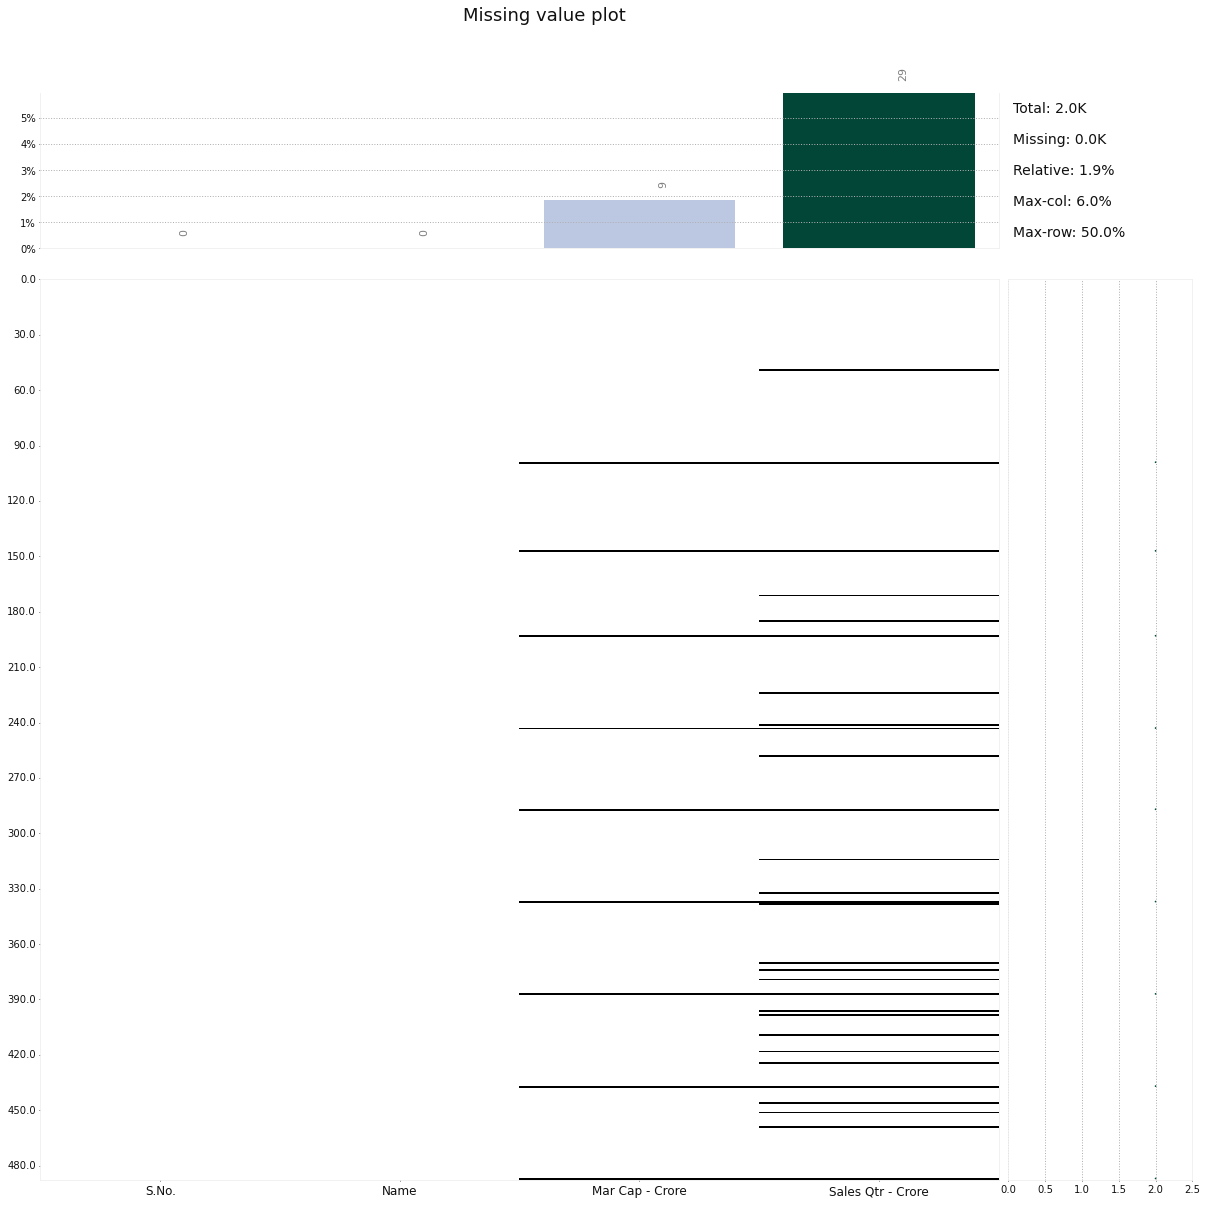

In [4]:
df1=klib.missingval_plot(df)

In [5]:
klib.data_cleaning(df)

Shape of cleaned data: (488, 4)Remaining NAs: 38

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.01 MB (-50.0%)



,s_no,name,mar_cap_crore,sales_qtr_crore
0,1,Reliance Inds.,583436.750000,99810.000000
1,2,TCS,563709.812500,30904.000000
2,3,HDFC Bank,482953.593750,20581.269531
3,4,ITC,320985.281250,9772.019531
4,5,H D F C,289497.375000,16840.509766
...,...,...,...,...
483,496,Lak. Vilas Bank,3029.570068,790.169983
484,497,NOCIL,3026.260010,249.270004
485,498,Orient Cement,3024.320068,511.529999
486,499,Natl.Fertilizer,3017.070068,2840.750000


<AxesSubplot:xlabel='Sales Qtr - Crore', ylabel='Density'>

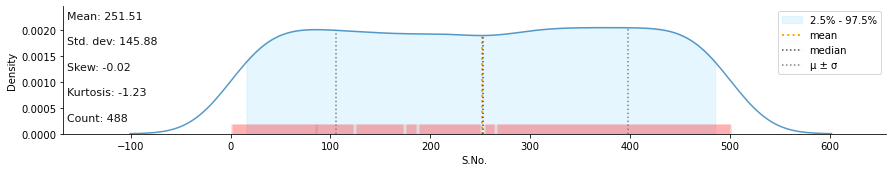

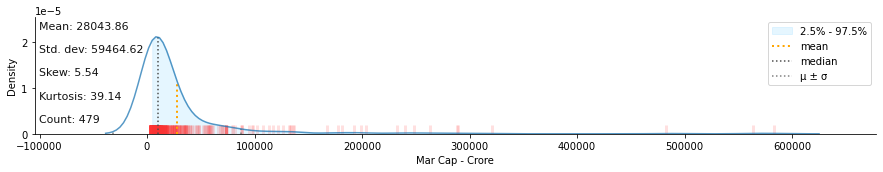

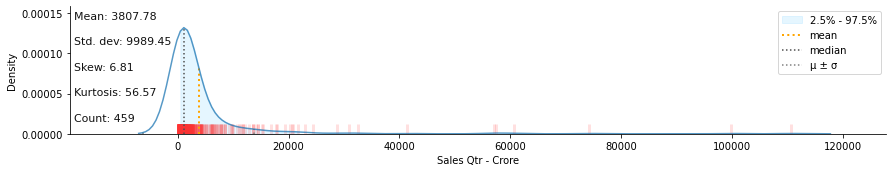

In [6]:
klib.dist_plot(df)

In [7]:
klib.corr_mat(df)

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
S.No.,1.00,-0.55,-0.39
Mar Cap - Crore,-0.55,1.00,0.62
Sales Qtr - Crore,-0.39,0.62,1.00


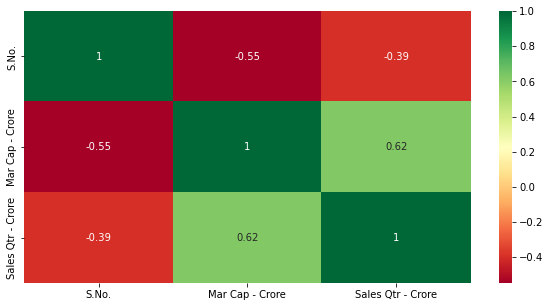

In [8]:
corrmat=df.corr()
df1=corrmat.index
plt.figure(figsize=(10,5))
g=sns.heatmap(df[df1].corr(),annot=True,cmap='RdYlGn')

In [12]:
df['Mar Cap - Crore'].dropna().sample(df['Mar Cap - Crore'].isnull().sum(),random_state=0)

15     167131.29
125     23094.39
142     18298.09
267      8183.96
172     14785.53
143     18254.06
444      3674.60
435      3761.86
114     25383.03
Name: Mar Cap - Crore, dtype: float64

In [13]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [14]:
impute_nan(df,'Mar Cap - Crore')

In [15]:
impute_nan(df,'Sales Qtr - Crore')

In [17]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Mar Cap - Crore_random,Sales Qtr - Crore_random
0,1,Reliance Inds.,583436.72,99810.00,583436.72,99810.00
1,2,TCS,563709.84,30904.00,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27,482953.59,20581.27
3,4,ITC,320985.27,9772.02,320985.27,9772.02
4,5,H D F C,289497.37,16840.51,289497.37,16840.51


In [18]:
ds=df.drop(['Mar Cap - Crore','Sales Qtr - Crore'],axis=1)

In [20]:
ds.isnull().sum()

S.No.                       0
Name                        0
Mar Cap - Crore_random      0
Sales Qtr - Crore_random    0
dtype: int64

<AxesSubplot:xlabel='Sales Qtr - Crore_random', ylabel='Density'>

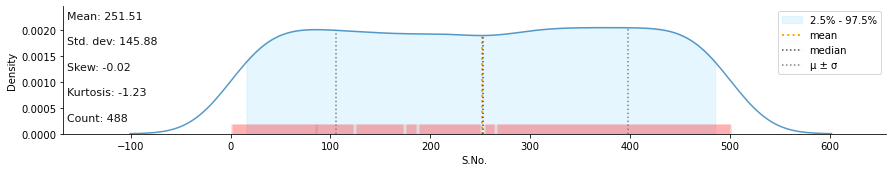

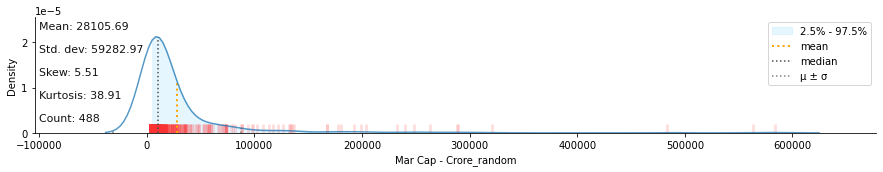

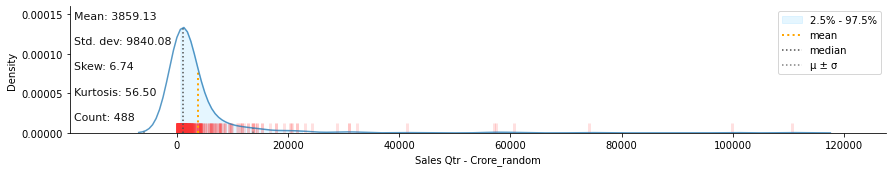

In [21]:
klib.dist_plot(ds)

In [22]:
ds.to_csv("C:\\Users\\Hp\\BankSales1.csv",index=False)